In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
feature1 = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/l1_.csv")
feature2 = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/l2_.csv")
feature3 = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/l3_.csv")

In [ ]:
feature12 = pd.concat([feature1,feature2],axis=1)

In [ ]:
feature23 = pd.concat([feature2,feature3],axis=1)

In [ ]:
x=feature2[['0.040325']].values
x.shape

(921600, 1)

In [ ]:
x = feature123[['0.674897', '0.040325', '0.02427']].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(feature13)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.14251987, 0.0168847 ],
       [2.28985873, 0.0293082 ],
       [6.66901243, 0.05078001]])

In [ ]:
y_clusters = kmeans.fit_predict(feature23)

In [ ]:
x=feature1[['0.674897']].values

In [ ]:
x = np.c_[x, kmeans.labels_]

In [ ]:
g=kmeans.labels_
g.shape


(921600,)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
res = labels[labels.flatten()]
result_image = res.reshape((959,961))

In [ ]:
fd = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/Freeman_Dbl.csv")
fo = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/Freeman_Odd.csv")
fv = pd.read_csv("/content/gdrive/MyDrive/TEST FILES ML/Freeman_Vol.csv")

In [ ]:
fdo = pd.concat([fd,fo],axis=1)
fdov = pd.concat([fdo,fv],axis=1)

In [ ]:
fdov.columns

Index(['0.001535', '0.572798', '0.086759'], dtype='object')

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(fdov)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df = pd.DataFrame(data=x.astype(float))
df.to_csv('imageMatrix.csv', sep='\n', header=False, float_format='%.6f', index=False)

In [ ]:
import csv
with open('imageMatrix.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(x)

In [ ]:
kmeans.cluster_centers_

array([[5.93994385e-02, 6.32791431e-02, 6.39000454e-02],
       [1.39050718e-02, 3.54342515e+00, 3.12134313e-01],
       [2.24735007e+01, 7.73160763e-01, 3.09143634e+00]])

In [ ]:
y_clusters = kmeans.fit_predict(fdov)

In [ ]:
x = fdov[['0.001535', '0.572798', '0.086759']].values

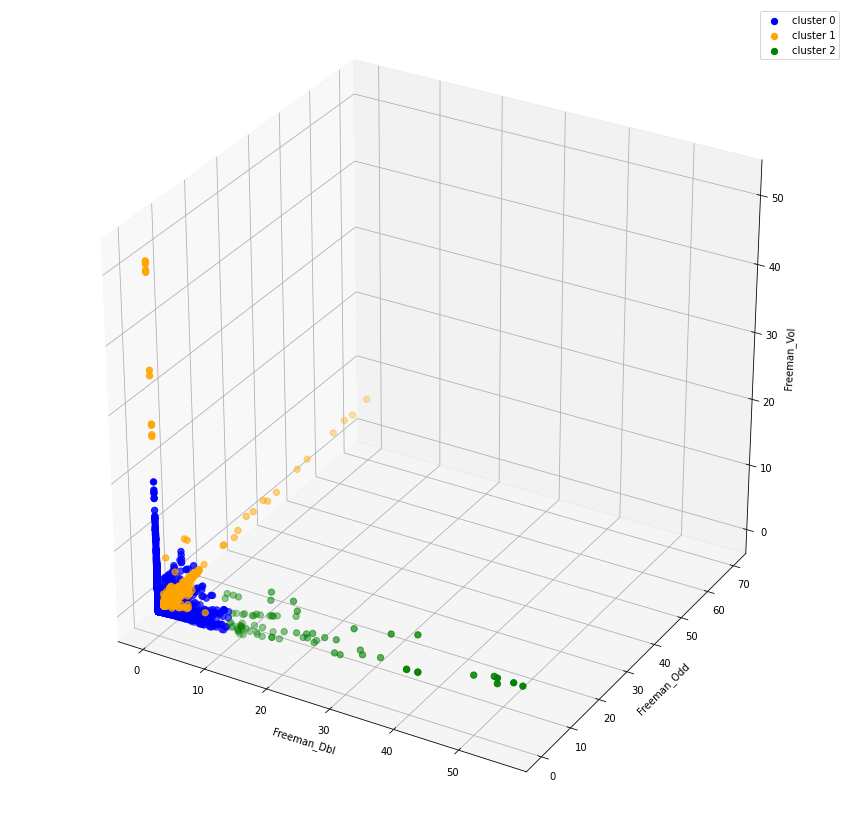

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Freeman_Dbl')
ax.set_ylabel('Freeman_Odd')
ax.set_zlabel('Freeman_Vol')
ax.legend()
plt.show()

In [ ]:
from typing import Union

from osgeo import gdal
import numpy as np
import cv2
import math
import cmath
import scipy.linalg as la



class Polarimetry:
    def _init_(self, b, w):

        self.__band = b
        self.__w = w
        self.__band_list = list()
        self.__band_list_avg = list()

        """
            A list is created to append all the full polarimetric channels with conjugates
        """

        for i in range(1, self.__band.RasterCount + 1):
            self._temp = self._band.GetRasterBand(i).ReadAsArray().astype(float)
            self._band_list.append(self._temp)

        for i in range(len(self.__band_list)):
            self._band_list_avg.append(cv2.blur(self.band_list[i], (self.w, self._w)))

        """
            The private variables are consisting of the fully polarimetric channels. As for a fully polarimetric
            synthetic aperture radar system, there are four components according to the Sinclair matrix.

            :param s_hh:           represents the horizontal-horizontal channel
            :param s_hh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_hv:           represents the horizontal-vertical channel
            :param s_hv_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vh:           represents the vertical-horizontal channel
            :param s_vh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vv:           represents the vertical-vertical channel
            :param s_vv_conj:      represents the conjugate of horizontal-horizontal channel
            :param b:              represents the object of bands
        """

        self._S_hh = self.band_list_avg[0] + 1j * self._band_list_avg[1]
        self._S_hh_conj = self.band_list_avg[0] - 1j * self._band_list_avg[1]
        self._S_hv = self.band_list_avg[2] + 1j * self._band_list_avg[3]
        self._S_hv_conj = self.band_list_avg[2] - 1j * self._band_list_avg[3]
        self._S_vh = self.band_list_avg[4] + 1j * self._band_list_avg[5]
        self._S_vh_conj = self.band_list_avg[4] - 1j * self._band_list_avg[5]
        self._S_vv = self.band_list_avg[6] + 1j * self._band_list_avg[7]
        self._S_vv_conj = self.band_list_avg[6] - 1j * self._band_list_avg[7]

    def get_cov_mat_img(self):

        """
            This function returns the 3 * 3 covariance matrix based on physically measurable parameters.
            The covariance matrix consists of 9 components.

            Format of the covariance matrix:

            [<Shh * conj(Shh)>              2 ^ 0.5 * <Shh * conj(Shv)>          <Shh * conj(Svv)>
             <2 ^ 0.5 * <Shv * conj(Shh)>     <2 * <Shv * conj(Shv)>           2 ^ 0.5 * <Shv * conj(Svv)>
             <Svv * conj(Shh)>              2 ^ 0.5 * <Svv * conj(Shv)>          <Svv * conj(Svv)>]

            :return: It returns the nine parameters. t_ij represents the components of covariance matrix with
            ith row and jth column
        """

        s_11 = abs(self._S_hh * self._S_hh_conj)
        s_12 = np.sqrt(2) * self._S_hh * self._S_hv_conj
        s_13 = self._S_hh * self._S_vv_conj
        s_21 = np.sqrt(2) * self._S_hv * self._S_hh_conj
        s_22 = abs(2 * self._S_hv * self._S_hv_conj)
        s_23 = np.sqrt(2) * self._S_hv * self._S_vv_conj
        s_31 = self._S_vv * self._S_hh_conj
        s_32 = np.sqrt(2) * self._S_vv * self._S_hv_conj
        s_33 = abs(self._S_vv * self._S_vv_conj)

        return [s_11, s_12, s_13, s_21, s_22, s_23, s_31, s_32, s_33]

    def get_coh_mat_img(self):

        """
            This function returns the 3 * 3 coherency (Pauli-based covariance) matrix based on
            physically measurable parameters based on mathematically and orthogonal Pauli matrix components.
            The coherency matrix consists of 9 components.

            Format of the coherency matrix:

            [<(Shh + Svv) * conj(Shh + Svv)>   <(Shh + Svv) * conj(Shh + Svv)>    2 * <(Shh + Svv) * conj(Shv)>
             <(Shh - Svv) * conj(Shh + Svv)>   <(Shh - Svv) * conj(Shh - Svv)>    2 * <(Shh - Svv) * conj(Shv)>
             <2 * Shv * conj(Shh + Svv)>       <2 * Shv * conj(Shh - Svv)>        4 * <Shv * conj(Shv)>]

            :return: It returns the nine parameters. s_ij represents the components of covariance matrix with
            ith row and jth column
        """

        t_11 = 0.5 * abs((self._S_hh + self.S_vv) * (self.S_hh_conj + self._S_vv_conj))
        t_12 = 0.5 * (self._S_hh + self.S_vv) * (self.S_hh_conj - self._S_vv_conj)
        t_13 = (self._S_hh + self.S_vv) * self._S_hv_conj
        t_21 = 0.5 * (self._S_hh - self.S_vv) * (self.S_hh_conj + self._S_vv_conj)
        t_22 = 0.5 * abs((self._S_hh - self.S_vv) * (self.S_hh_conj - self._S_vv_conj))
        t_23 = (self._S_hh - self.S_vv) * self._S_hv_conj
        t_31 = self._S_hv * (self.S_hh_conj + self._S_vv_conj)
        t_32 = self._S_hv * (self.S_hh_conj - self._S_vv_conj)
        t_33 = 2 * abs(self._S_hv * self._S_hv_conj)

        return [t_11, t_12, t_13, t_21, t_22, t_23, t_31, t_32, t_33]

    def get_eig_val(self):

        """
            This function returns the eigen values extracted from the 3 * 3 coherency matrix.
        """

        coh_mat = self.get_coh_mat_img()

        rows, cols = np.shape(coh_mat[0])[0], np.shape(coh_mat[0])[1]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        ev1 = np.zeros([rows, cols], dtype=complex)
        ev2 = np.zeros([rows, cols], dtype=complex)
        ev3 = np.zeros([rows, cols], dtype=complex)

        for i in range(rows):
            for j in range(cols):

                x = np.array([
                    [t11[i, j], t12[i, j], t13[i, j]],
                    [t21[i, j], t22[i, j], t23[i, j]],
                    [t31[i, j], t32[i, j], t33[i, j]]
                ])

                ev1[i, j] = abs(la.eig(x)[0][0])
                ev2[i, j] = abs(la.eig(x)[0][1])
                ev3[i, j] = abs(la.eig(x)[0][2])

                if ev2[i, j] < ev3[i, j]:
                    ev2[i, j], ev3[i, j] = ev3[i, j], ev2[i, j]

        ev1[~np.isfinite(ev1)] = 0
        ev2[~np.isfinite(ev2)] = 0
        ev3[~np.isfinite(ev3)] = 0

        trt = t11 + t22 + t33

        return [ev1, ev2, ev3, trt]

    def get_eig_vect(self):

        """
            This function returns the normalized eigen vectors extracted from the coherency matrix
        """

        coh_mat = self.get_coh_mat_img()

        rows, cols = np.shape(coh_mat[0])[0], np.shape(coh_mat[0])[1]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        list2 = list()

        for i in range(rows):
            list1 = list()
            for j in range(cols):

                x = np.array([
                    [t11[i, j], t12[i, j], t13[i, j]],
                    [t21[i, j], t22[i, j], t23[i, j]],
                    [t31[i, j], t32[i, j], t33[i, j]]
                ])

                list1.append(la.eig(x)[1])

            list2.append(list1)

        print(len(list2))
        x = np.array(list2)
        y = np.reshape(x, (rows, cols, 3, 3))
        print(np.shape(y))
        print(type(y[1, 1][1, 1]))

        return y

    def rot_coh_mat_img(self):

        """
            This function returns rotated version of the 3 * 3 coherency (Pauli-based covariance) matrix based on
            physically measurable parameters based on mathematically and orthogonal Pauli matrix components.
            The rotated coherency matrix consists of 9 components.

            t_ij_theta: the components of rotated coherency matrix is derived by multiplying the 3 * 3 rotation
            matrices and its transpose conjugate.

            Format of the rotation matrix:

                          [1             0                    0
            Rp(theta)  =   0       cos(2 * theta)      sin(2 * theta)
                           0     - sin(2 * theta)      cos(2 * theta)]


            T(theta) = Rp(theta) * T * transpose(conj(Rp(theta))

            T         => Denote the coherency matrix
            theta     => Denote the rotation angle
            T(theta)  => Denote the rotated coherency matrix

            :return: It returns the nine parameters. t_ij_theta represents the components of
            rotated coherency matrix with ith row and jth column
        """

        t = self.get_coh_mat_img()
        rows, cols = np.shape(t[0])[0], np.shape(t[0])[1]
        t_theta_mat = np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):
                a = t[5][i, j].real
                b, c = t[4][i, j], t[8][i, j]
                if b == c:
                    t_theta_mat[i, j] = math.pi / 4
                else:
                    t_theta_mat[i, j] = 0.5 * math.atan((2 * a.real) / (b - c))

        t_11_theta = t[0]
        t_12_theta = t[1] * np.cos(t_theta_mat) + t[2] * np.sin(t_theta_mat)
        t_13_theta = - t[1] * np.sin(t_theta_mat) + t[2] * np.cos(t_theta_mat)
        t_21_theta = np.conj(t_12_theta)
        t_22_theta = t[4] * (np.cos(t_theta_mat) * 2) + t[8] * (np.sin(t_theta_mat) * 2)
        t_22_theta += np.real(t[5]) * np.sin(2 * t_theta_mat)
        t_23_theta = np.imag(t[5]) * 1j
        t_31_theta = np.conj(t_13_theta)
        t_32_theta = - np.imag(t[5]) * 1j
        t_33_theta = t[8] * (np.cos(t_theta_mat) * 2) + t[4] * (np.sin(t_theta_mat) * 2)
        t_33_theta -= np.real(t[5]) * (np.sin(t_theta_mat) ** 2)

        return [t_11_theta, t_12_theta, t_13_theta, t_21_theta, t_22_theta,
                t_23_theta, t_31_theta, t_32_theta, t_33_theta]

    def get_image(self, ps, pd, pv, pc):

        """
            After estimating the corresponding power term, we generate the decomposed power images of surface,
            double-bounce and volume scattering respectively.

            :param ps:      power term associated with surface scattering
            :param pd:      power term associated with double-bounce scattering
            :param pv:      power term associated with volume scattering
            :param pc:      power term associated with helix scattering
            :return:        Images of surface, double-bounce, and volume scattering
        """

        cols, rows = pd.shape
        driver = gdal.GetDriverByName("GTiff")
        outfile = 'helix_Scattering_yamaguchi'
        outfile += '.tiff'
        out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
        out_data.SetProjection(self.__band.GetProjection())
        out_data.SetGeoTransform(self.__band.GetGeoTransform())
        out_data.GetRasterBand(1).WriteArray(pc / (ps + pd + pv + pc))

    def get_band(self):
        return self.__band


class ModTouzi(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w

    def get_psi(self):

        """
 
            Paper Details: "Target Scattering Decomposition in Terms of Roll-Invariant Target Parameters"

            IEEEXplore: https://ieeexplore.ieee.org/document/4039635

            DOI: 10.1109/TGRS.2006.886176

            With the projection of Kennaugh-Huynen scattering matrix into the Pauli basis, this model established
            the basis invariant representation of coherent target scattering.

            alp:       for symmetric scattering type magnitude (normalized)
            phi:       for symmetric scattering type phase (normalized)
            psi:       orientation angle (Kennaugh-Huynen maximum polarization parameter (normalized)
            tau:       target helicity (normalized)

            :return: It returns alp, psi, tau, phi
        """

        ev = self.get_eig_val()
        ev1, ev2, ev3, trt = ev[0], ev[1], ev[2], ev[3]

        p1 = ev1 / trt
        p2 = ev2 / trt
        p3 = ev3 / trt

        rows, cols = np.shape(ev[0])[0], np.shape(ev[0])[1]
        eig_vect = self.get_eig_vect()

        alp1, alp2, alp3 = np.zeros([rows, cols]), np.zeros([rows, cols]), np.zeros([rows, cols])
        psi1, psi2, psi3 = np.zeros([rows, cols]), np.zeros([rows, cols]), np.zeros([rows, cols])
        tau1, tau2, tau3 = np.zeros([rows, cols]), np.zeros([rows, cols]), np.zeros([rows, cols])
        phis1, phis2, phis3 = np.zeros([rows, cols]), np.zeros([rows, cols]), np.zeros([rows, cols])

        print(np.shape(eig_vect))

        for i in range(rows):
            for j in range(cols):
                u = np.array([
                    [eig_vect[i, j][0, 0], eig_vect[i, j][0, 1], eig_vect[i, j][0, 2]],
                    [eig_vect[i, j][1, 0], eig_vect[i, j][1, 1], eig_vect[i, j][1, 2]],
                    [eig_vect[i, j][2, 0], eig_vect[i, j][2, 1], eig_vect[i, j][2, 2]]
                ])

                psi1[i, j] = 0.5 * np.arctan(abs(np.real(u[2, 0]) / np.real(u[1, 0]))) * 180 / math.pi
                alp1[i, j] = np.arcsin(abs(np.real(u[1, 0]) / np.cos(2 * psi1[i, j] * math.pi / 180))) * 180 / math.pi
                tau1[i, j] = 0.5 * np.arccos(np.real(u[0, 0]) / np.cos(alp1[i, j] * math.pi / 180)) * 180 / math.pi

                psi2[i, j] = 0.5 * np.arctan(abs(np.real(u[2, 1]) / np.real(u[1, 1]))) * 180 / math.pi
                alp2[i, j] = np.arcsin(abs(np.real(u[1, 1]) / np.cos(2 * psi2[i, j] * math.pi / 180))) * 180 / math.pi
                tau2[i, j] = 0.5 * np.arccos(np.real(u[0, 1]) / np.cos(alp2[i, j] * math.pi / 180)) * 180 / math.pi

                psi3[i, j] = 0.5 * np.arctan(abs(np.real(u[2, 2]) / np.real(u[1, 2]))) * 180 / math.pi
                alp3[i, j] = np.arcsin(abs(np.real(u[1, 2]) / np.cos(2 * psi3[i, j] * math.pi / 180))) * 180 / math.pi
                tau3[i, j] = 0.5 * np.arccos(np.real(u[0, 2]) / np.cos(alp3[i, j] * math.pi / 180)) * 180 / math.pi

                phis1[i, j] = np.arctan(np.imag(u[1, 0]) / np.real(u[1, 0])) * 180 / math.pi
                phis2[i, j] = np.arctan(np.imag(u[1, 1]) / np.real(u[1, 1])) * 180 / math.pi
                phis3[i, j] = np.arctan(np.imag(u[1, 2]) / np.real(u[1, 2])) * 180 / math.pi

        alp = p1 * alp1 + p2 * alp2 + p3 * alp3
        psi = p1 * psi1 + p2 * psi2 + p3 * psi3
        tau = p1 * tau1 + p2 * tau2 + p3 * tau3
        phi = p1 * phis1 + p2 * phis2 + p3 * phis3

        return [alp, psi, tau, phi]

    def get_result(self):
        x = self.get_psi()

        scattering_list = ['alpha', 'psi', 'tau', 'phi']

        for i in range(len(x)):

            cols, rows = x[0].shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Touzi_New'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class Touzi(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w

    def get_eig_value(self):
        coh_mat = self.get_coh_mat_img()

        rows, cols = np.shape(coh_mat[0])[0], np.shape(coh_mat[0])[1]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        ev1 = np.zeros([rows, cols], dtype=complex)
        ev2 = np.zeros([rows, cols], dtype=complex)
        ev3 = np.zeros([rows, cols], dtype=complex)

        for i in range(rows):
            for j in range(cols):

                x = np.array([
                    [t11[i, j], t12[i, j], t13[i, j]],
                    [t21[i, j], t22[i, j], t23[i, j]],
                    [t31[i, j], t32[i, j], t33[i, j]]
                ])

                ev1[i, j] = abs(la.eig(x)[0][0])
                ev2[i, j] = abs(la.eig(x)[0][1])
                ev3[i, j] = abs(la.eig(x)[0][2])

                if ev2[i, j] < ev3[i, j]:
                    ev2[i, j], ev3[i, j] = ev3[i, j], ev2[i, j]

        ev1[~np.isfinite(ev1)] = 0
        ev2[~np.isfinite(ev2)] = 0
        ev3[~np.isfinite(ev3)] = 0

        trt = t11 + t22 + t33
        """
        det = t11 * t22 * t33 - t33 * t12 * np.conj(t12) - t22 * t13 * np.conj(t13)
        det += t12 * np.conj(t13) * t23 + np.conj(t12) * t13 * np.conj(t23) - t11 * t23 * np.conj(t23)
        det = abs(det)

        a = abs(t11 * t22 + t11 * t33 + t22 * t33 - t12 * np.conj(t12) - t13 * np.conj(t13) - t23 * np.conj(t23))

        b = t11 * t11 - t11 * t22 + t22 * t22 - t11 * t33 - t22 * t33 + t33 * t33
        b = b + 3.0 * (t12 * np.conj(t12) + t13 * np.conj(t13) + t23 * np.conj(t23))

        c = 27.0 * det - 9.0 * a * trt + 2.0 * (trt ** 3)
        c = c + 0.0j
        c = c + np.sqrt(c * 2.0 - 4.0 * b * 3.0)
        c = c ** (1.0 / 3.0)

        trt = (1.0 / 3.0) * trt

        eig1 = trt + ((2 * (1.0 / 3.0)) * b) / (3.0 * c) + c / (3.0 * 2 * (1.0 / 3.0))
        eig2 = trt - complex(1, math.sqrt(3)) * b / (3 * 2 ** (2 / 3) * c) - complex(
            1, -math.sqrt(3)) * c / (6 * 2 ** (1 / 3))
        eig3 = trt - complex(1, -math.sqrt(3)) * b / (3 * 2 ** (2 / 3) * c) - complex(
            1, math.sqrt(3)) * c / (6 * 2 ** (1 / 3))

        eig1, eig2, eig3 = abs(eig1), abs(eig2), abs(eig3)

        eig1[~np.isfinite(eig1)] = 0
        eig2[~np.isfinite(eig2)] = 0
        eig3[~np.isfinite(eig3)] = 0

        x = eig2 >= eig3
        y = eig2 < eig3

        ref_eig2 = x * eig2 + y * eig3
        ref_eig3 = x * eig3 + y * eig2

        print(ref_eig2[200:205, 200:205], ref_eig3[200:205, 200:205])

        trt = t11 + t22 + t33
        """

        return [ev1, ev2, ev3, trt]

    def get_params(self):

        """

            Paper Details: "Target Scattering Decomposition in Terms of Roll-Invariant Target Parameters"

            IEEEXplore: https://ieeexplore.ieee.org/document/4039635

            DOI: 10.1109/TGRS.2006.886176

            With the projection of Kennaugh-Huynen scattering matrix into the Pauli basis, this model established
            the basis invariant representation of coherent target scattering.

            U3 = [cos(alp1)*cos(2*taum1)              cos(alp2)*cos(2*taum2)              cos(alp3)*cos(2*taum3)
                 sin(alp1)*exp(j*phi1)                sin(alp2)*exp(j*phi2)               sin(alp3)*exp(j*phi3)
                 -j*cos(alp1)*sin(2*taum1)            -j*cos(alp2)*sin(2*taum2)           -j*cos(alp3)*sin(2*taum3)]

            T = U3 * [lambda1    0        0       * Transpose(conj(U3))
                       0      lambda2     0
                       0         0     lambda3]

            alp:       for symmetric scattering type magnitude (normalized)
            phi:       for symmetric scattering type phase (normalized)
            psi:       orientation angle (Kennaugh-Huynen maximum polarization parameter (normalized)
            tau:       target helicity (normalized)

            Pseudo Probability = The pseudo probability is estimated by normalizing each eigen values with the
                                total summation of all the eigen values

            :return: It returns u11, u12, u13, u21, u22, u23 of U3 matrix and pseudo probabilities

            ** Note: In this implementation, orientation angle has been neglected. Please refer ModTouzi for the
            orientation angle
        """

        coh_mat = self.get_coh_mat_img()
        x = self.get_eig_value()
        ev1, ev2, ev3 = x[0], x[1], x[2]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        t12c, t13c, t23c = np.conj(t12), np.conj(t13), np.conj(t23)

        u11 = (ev1 - t33) / t13c + ((ev1 - t33) * t12c + t13c * t23) * t23c / (
                ((t22 - ev1) * t13c - t12c * t23c) * t13c)

        u21 = ((ev1 - t33) * t12c + t13c * t23) / ((t22 - ev1) * t13c - t12c * t23c)

        nrm = np.sqrt(u11 * np.conj(u11) + u21 * np.conj(u21) + 1)

        u11 = u11 / nrm
        u21 = u21 / nrm

        u11[~np.isfinite(u11)] = 0
        u21[~np.isfinite(u21)] = 0

        u12 = (ev2 - t33) / t13c + ((ev2 - t33) * t12c + t13c * t23) * t23c / (
                ((t22 - ev2) * t13c - t12c * t23c) * t13c)

        u22 = ((ev2 - t33) * t12c + t13c * t23) / ((t22 - ev2) * t13c - t12c * t23c)

        nrm = np.sqrt(u12 * np.conj(u12) + u22 * np.conj(u22) + 1)

        u12 = u12 / nrm
        u22 = u22 / nrm

        u12[~np.isfinite(u12)] = 0
        u22[~np.isfinite(u22)] = 0

        u13 = (ev3 - t33) / t13c + ((ev3 - t33) * t12c + t13c * t23) * t23c / (
                ((t22 - ev3) * t13c - t12c * t23c) * t13c)

        u23 = ((ev3 - t33) * t12c + t13c * t23) / ((t22 - ev3) * t13c - t12c * t23c)

        nrm = np.sqrt(u13 * np.conj(u13) + u23 * np.conj(u23) + 1)

        u13 = u13 / nrm
        u23 = u23 / nrm

        u13[~np.isfinite(u13)] = 0
        u23[~np.isfinite(u23)] = 0

        trt = t11 + t22 + t33

        p1 = ev1 / trt
        p2 = ev2 / trt
        p3 = ev3 / trt

        p1[~np.isfinite(p1)] = 0
        p2[~np.isfinite(p2)] = 0
        p3[~np.isfinite(p3)] = 0

        return [u11, u12, u13, u21, u22, u23, p1, p2, p3]

    def get_alpha(self):

        """
        The alpha parameter is introduced as a symmetric scattering type magnitude

                tan(alpha) * exp(phi) = {(mu1 - mu2) / (mu1 + mu2)}
                mu1, mu2 are coneignevalues

        :return: It returns the normalized alpha using the linear combination of pseudo probabilities and alpha
        parameters (p1 * alpha1 + p2 * alpha2 + p3 * alpha3)
        """

        x = self.get_params()
        u11, u12, u13 = x[0], x[1], x[2]
        u21, u22, u23 = x[3], x[4], x[5]
        p1, p2, p3 = x[6], x[7], x[8]

        alps1 = np.arcsin(abs(u21)) * 180 / math.pi
        alps2 = np.arcsin(abs(u22)) * 180 / math.pi
        alps3 = np.arcsin(abs(u23)) * 180 / math.pi

        alps1[~np.isfinite(alps1)] = 0
        alps2[~np.isfinite(alps2)] = 0
        alps3[~np.isfinite(alps3)] = 0

        alps = p1 * alps1 + p2 * alps2 + p3 * alps3

        return [u11, u12, u13, u21, u22, u23, p1, p2, p3, alps]

    def get_tau(self):

        """
        The tau parameter is defined as the target helicity. Under the assumption of target reciprocity, the Kennaugh-
        Huynen condiagonalization is performed using:

                [S] = [R(psi)].[T(taum)].[Sd].[T(taum)].[R(-psi)]

                [R(psi)] = [cos(psi)    - sin(psi)      [T(taum)] = [cos(taum)       -j * sin(taum)   Sd = [mu1   0
                            sin(psi)      cos(psi)]                  -j * sin(taum)    cos(taum)]            0   mu2]

        :return: It returns the normalized tau using the linear combination of pseudo probabilities and tau
        parameters (p1 * tau1 + p2 * tau2 + p3 * tau3)
        """

        x = self.get_alpha()
        u11, u12, u13 = x[0], x[1], x[2]
        u21, u22, u23 = x[3], x[4], x[5]
        p1, p2, p3 = x[6], x[7], x[8]
        alps = x[9]

        taum1 = 0.5 * np.arccos(abs(u11 / (np.cos(u21 * math.pi / 180)))) * 180 / math.pi
        taum2 = 0.5 * np.arccos(abs(u12 / (np.cos(u22 * math.pi / 180)))) * 180 / math.pi
        taum3 = 0.5 * np.arccos(abs(u13 / (np.cos(u23 * math.pi / 180)))) * 180 / math.pi

        taum1[~np.isfinite(taum1)] = 0
        taum2[~np.isfinite(taum2)] = 0
        taum3[~np.isfinite(taum3)] = 0

        taum = p1 * taum1 + p2 * taum2 + p3 * taum3

        return [u11, u12, u13, u21, u22, u23, p1, p2, p3, alps, taum]

    def get_phi(self):

        """
        The parameter phi is the phase difference between the vector components in the trihedral-dihedral basis

        :return: It returns the normalized phi using the linear combination of pseudo probabilities and phi
        parameters (p1 * tau1 + p2 * tau2 + p3 * tau3)
        """

        x = self.get_tau()
        # u11, u12, u13 = x[0], x[1], x[2]
        u21, u22, u23 = x[3], x[4], x[5]
        p1, p2, p3 = x[6], x[7], x[8]
        alps, taum = x[9], x[10]

        phis1 = np.arctan(np.imag(u21) / np.real(u21)) * 180 / math.pi
        phis2 = np.arctan(np.imag(u22) / np.real(u22)) * 180 / math.pi
        phis3 = np.arctan(np.imag(u23) / np.real(u23)) * 180 / math.pi

        phis = p1 * phis1 + p2 * phis2 + p3 * phis3

        return [alps, taum, phis]

    def get_result(self):
        x = self.get_phi()

        scattering_list = ['alpha', 'tau', 'phi']

        for i in range(len(x)):

            cols, rows = x[0].shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Touzi'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class HAAlpha(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w

    def get_eigen_value(self):

        coh_mat = self.get_coh_mat_img()

        rows, cols = np.shape(coh_mat[0])[0], np.shape(coh_mat[0])[1]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        ev1 = np.zeros([rows, cols], dtype=complex)
        ev2 = np.zeros([rows, cols], dtype=complex)
        ev3 = np.zeros([rows, cols], dtype=complex)

        for i in range(rows):
            for j in range(cols):

                x = np.array([
                              [t11[i, j], t12[i, j], t13[i, j]],
                              [t21[i, j], t22[i, j], t23[i, j]],
                              [t31[i, j], t32[i, j], t33[i, j]]
                             ])

                ev1[i, j] = abs(la.eig(x)[0][0])
                ev2[i, j] = abs(la.eig(x)[0][1])
                ev3[i, j] = abs(la.eig(x)[0][2])

                if ev2[i, j] < ev3[i, j]:
                    ev2[i, j], ev3[i, j] = ev3[i, j], ev2[i, j]

        ev1[~np.isfinite(ev1)] = 0
        ev2[~np.isfinite(ev2)] = 0
        ev3[~np.isfinite(ev3)] = 0

        trt = t11 + t22 + t33
        """
        det = t11 * t22 * t33 - t33 * t12 * np.conj(t12) - t22 * t13 * np.conj(t13)
        det += t12 * np.conj(t13) * t23 + np.conj(t12) * t13 * np.conj(t23) - t11 * t23 * np.conj(t23)
        det = abs(det)

        a = abs(t11 * t22 + t11 * t33 + t22 * t33 - t12 * np.conj(t12) - t13 * np.conj(t13) - t23 * np.conj(t23))

        b = t11 * t11 - t11 * t22 + t22 * t22 - t11 * t33 - t22 * t33 + t33 * t33
        b = b + 3.0 * (t12 * np.conj(t12) + t13 * np.conj(t13) + t23 * np.conj(t23))

        c = 27.0 * det - 9.0 * a * trt + 2.0 * (trt ** 3)
        c = c + 0.0j
        c = c + np.sqrt(c * 2.0 - 4.0 * b * 3.0)
        c = c ** (1.0 / 3.0)

        trt = (1.0 / 3.0) * trt

        eig1 = trt + ((2 * (1.0 / 3.0)) * b) / (3.0 * c) + c / (3.0 * 2 * (1.0 / 3.0))
        eig2 = trt - complex(1, math.sqrt(3)) * b / (3 * 2 ** (2 / 3) * c) - complex(
            1, -math.sqrt(3)) * c / (6 * 2 ** (1 / 3))
        eig3 = trt - complex(1, -math.sqrt(3)) * b / (3 * 2 ** (2 / 3) * c) - complex(
            1, math.sqrt(3)) * c / (6 * 2 ** (1 / 3))

        eig1, eig2, eig3 = abs(eig1), abs(eig2), abs(eig3)

        eig1[~np.isfinite(eig1)] = 0
        eig2[~np.isfinite(eig2)] = 0
        eig3[~np.isfinite(eig3)] = 0

        x = eig2 >= eig3
        y = eig2 < eig3

        ref_eig2 = x * eig2 + y * eig3
        ref_eig3 = x * eig3 + y * eig2

        print(ref_eig2[200:205, 200:205], ref_eig3[200:205, 200:205])

        trt = t11 + t22 + t33
        """

        return [ev1, ev2, ev3, trt]

    def get_entropy(self):

        """
        The scattering entropy is associated with the degree of randomness under the assumption of reflection symmetric
        media. The entropy is calculated using the eigen values and pseudo probabilities as follows:

        H = - (p1 * log3(p1) + p2 * log3(p2) + p3 * log3(p3))

        The pseudo probabilities are estimated as

        p1 = lambda1 / (lambda1 + lambda2 + lambda3)
        p2 = lambda2 / (lambda1 + lambda2 + lambda3)
        p3 = lambda3 / (lambda1 + lambda2 + lambda3)

        :return: It returns primarily the entropy along with three eigen values extracted from the 3 * 3 coherency
        matrices
        """

        x = self.get_eigen_value()
        ev1, ev2, ev3, trt = x[0], x[1], x[2], x[3]

        p1 = ev1 / trt
        p2 = ev2 / trt
        p3 = ev3 / trt

        ent = - (p1 * (np.log(p1) / np.log(3)) + p2 * (np.log(p2) / np.log(3)) + p3 * (np.log(p3) / np.log(3)))
        ent[~np.isfinite(ent)] = 0

        return [ent, ev1, ev2, ev3]

    def get_anisotropy(self):

        """
        The anisotropy is the measure of the amount of the forward direction retained after a single scattering event

        :return:It returns majorly the anisotropy
        """

        x = self.get_entropy()
        ent = x[0]
        ev1, ev2, ev3 = x[1], x[2], x[3]

        ani = abs((ev2 - ev3) / (ev2 + ev3))

        ani[~np.isfinite(ani)] = 0

        return [ani, ev1, ev2, ev3, ent]

    def get_alpha(self):

        """

            Paper Details: "An entropy based classification scheme for land applications of polarimetric SAR"

            IEEEXplore: https://ieeexplore.ieee.org/document/551935

            DOI: 10.1109/36.551935

            This method employs the eigen value analysis of coherency matrix by employing 3-level Bernoulli
            statistical model to estimate the average target scattering parameters.

            U3 = [cos(alp1)                             cos(alp2)                            cos(alp3)
                 sin(alp1)*cos(beta1)*exp(j*del1)       sin(alp1)*cos(beta1)*exp(j*del2)     sin(alp1)*cos(beta3)*exp(j*del3)
                 sin(alp1)*sin(beta1)*exp(j*gama1)      sin(alp2)*cos(beta2)*exp(j*gama2)    sin(alp3)*sin(beta3)*exp(j*gama3)]

            T = U3 * [lambda1    0        0       * Transpose(conj(U3))
                       0      lambda2     0
                       0         0     lambda3]

            Pseudo Probability = The pseudo probability is estimated by normalizing each eigen values with the
                                total summation of all the eigen values

            :return: It returns the alpha parameter along with entropy and anisotropy
        """

        coh_mat = self.get_coh_mat_img()
        x = self.get_anisotropy()
        ev1, ev2, ev3 = x[1], x[2], x[3]
        ent, ani = x[4], x[0]

        t11, t12, t13 = coh_mat[0], coh_mat[1], coh_mat[2]
        t21, t22, t23 = coh_mat[3], coh_mat[4], coh_mat[5]
        t31, t32, t33 = coh_mat[6], coh_mat[7], coh_mat[8]

        t12c, t13c, t23c = np.conj(t12), np.conj(t13), np.conj(t23)

        u11 = (ev1 - t33) / t13c + ((ev1 - t33) * t12c + t13c * t23) * t23c / (
                ((t22 - ev1) * t13c - t12c * t23c) * t13c)

        u21 = ((ev1 - t33) * t12c + t13c * t23) / ((t22 - ev1) * t13c - t12c * t23c)

        nrm = np.sqrt(u11 * np.conj(u11) + u21 * np.conj(u21) + 1)

        u11 = u11 / nrm
        u21 = u21 / nrm

        u11[~np.isfinite(u11)] = 0
        u21[~np.isfinite(u21)] = 0

        u12 = (ev2 - t33) / t13c + ((ev2 - t33) * t12c + t13c * t23) * t23c / (
                    ((t22 - ev2) * t13c - t12c * t23c) * t13c)

        u22 = ((ev2 - t33) * t12c + t13c * t23) / ((t22 - ev2) * t13c - t12c * t23c)

        nrm = np.sqrt(u12 * np.conj(u12) + u22 * np.conj(u22) + 1)

        u12 = u12 / nrm
        u22 = u22 / nrm

        u12[~np.isfinite(u12)] = 0
        u22[~np.isfinite(u22)] = 0

        u13 = (ev3 - t33) / t13c + ((ev3 - t33) * t12c + t13c * t23) * t23c / (
                ((t22 - ev3) * t13c - t12c * t23c) * t13c)

        u23 = ((ev3 - t33) * t12c + t13c * t23) / ((t22 - ev3) * t13c - t12c * t23c)

        nrm = np.sqrt(u13 * np.conj(u13) + u23 * np.conj(u23) + 1)

        u13 = u13 / nrm
        u23 = u23 / nrm

        u13[~np.isfinite(u13)] = 0
        u23[~np.isfinite(u23)] = 0

        trt = t11 + t22 + t33

        p1 = ev1 / trt
        p2 = ev2 / trt
        p3 = ev3 / trt

        p1[~np.isfinite(p1)] = 0
        p2[~np.isfinite(p2)] = 0
        p3[~np.isfinite(p3)] = 0

        alp1 = np.arccos(abs(u11)) * 180 / math.pi
        alp2 = np.arccos(abs(u12)) * 180 / math.pi
        alp3 = np.arccos(abs(u13)) * 180 / math.pi

        alp1[~np.isfinite(alp1)] = 0
        alp2[~np.isfinite(alp2)] = 0
        alp3[~np.isfinite(alp3)] = 0

        alp = p1 * alp1 + p2 * alp2 + p3 * alp3

        return [ent, ani, alp]

    def get_result(self):
        x = self.get_alpha()
        ent, ani, alp = x[0], x[1], x[2]

        scattering_list = ['entropy', 'anisotropy', 'alpha']

        for i in range(len(x)):

            cols, rows = ent.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Cloude_Pottier'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class Sinclair(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w
        self.__band_list = list()
        self.__band_list_avg = list()

        for i in range(self.__band.RasterCount):
            self._band_list.append(self._band.GetRasterBand(i).ReadAsArray().astype(float))

        for i in range(len(self.__band_list)):
            self._band_list_avg.append(cv2.blur(self._band_list[i], (5, 5)))

        """
            The private variables are consisting of the fully polarimetric channels. As for a fully polarimetric
            synthetic aperture radar system, there are four components according to the Sinclair matrix.

            :param s_hh:           represents the horizontal-horizontal channel
            :param s_hh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_hv:           represents the horizontal-vertical channel
            :param s_hv_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vh:           represents the vertical-horizontal channel
            :param s_vh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vv:           represents the vertical-vertical channel
            :param s_vv_conj:      represents the conjugate of horizontal-horizontal channel
            :param b:              represents the object of bands
        """

        self._S_hh = self.band_list_avg[0] + 1j * self._band_list_avg[1]
        self._S_hh_conj = self.band_list_avg[0] - 1j * self._band_list_avg[1]
        self._S_hv = self.band_list_avg[2] + 1j * self._band_list_avg[3]
        self._S_hv_conj = self.band_list_avg[2] - 1j * self._band_list_avg[3]
        self._S_vh = self.band_list_avg[4] + 1j * self._band_list_avg[5]
        self._S_vh_conj = self.band_list_avg[4] - 1j * self._band_list_avg[5]
        self._S_vv = self.band_list_avg[6] + 1j * self._band_list_avg[7]
        self._S_vv_conj = self.band_list_avg[6] - 1j * self._band_list_avg[7]

    def get_decomposition(self):

        """
            Book: Polarimetric Radar Imaging: From basics to applications

            General form of Sinclair matrix
            [S] = [S11      S12
                   S21      S22]

        :return: It returns the three intensity parameters based on Sinclair Matrix
        """
        intensity1 = abs(self._S_vv * self._S_vv_conj)
        intensity2 = 0.25 * abs((self._S_hv + self.S_vh) * (self.S_hv_conj + self._S_vh_conj))
        intensity3 = abs(self._S_hh * self._S_hh_conj)

        return [10 * np.log10(abs(intensity1)), 10 * np.log10(abs(intensity2)), 10 * np.log10(abs(intensity3))]

    def get_result(self):
        x = self.get_decomposition()
        intensity1, intensity2, intensity3 = x[0], x[1], x[2]

        scattering_list = ['intensity1', 'intensity2', 'intensity3']

        for i in range(len(x)):

            cols, rows = intensity1.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Sinclair'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i] / (intensity1 + intensity2 + intensity3))


class Cloude(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w
        self.__band_list = list()
        self.__band_list_avg = list()

        for i in range(self.__band.RasterCount):
            self._band_list.append(self._band.GetRasterBand(i).ReadAsArray().astype(float))

        for i in range(len(self.__band_list)):
            self._band_list_avg.append(cv2.blur(self._band_list[i], (5, 5)))

        """
            The private variables are consisting of the fully polarimetric channels. As for a fully polarimetric
            synthetic aperture radar system, there are four components according to the Sinclair matrix.

            :param s_hh:           represents the horizontal-horizontal channel
            :param s_hh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_hv:           represents the horizontal-vertical channel
            :param s_hv_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vh:           represents the vertical-horizontal channel
            :param s_vh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vv:           represents the vertical-vertical channel
            :param s_vv_conj:      represents the conjugate of horizontal-horizontal channel
            :param b:              represents the object of bands
        """

        self._S_hh = self.band_list_avg[0] + 1j * self._band_list_avg[1]
        self._S_hh_conj = self.band_list_avg[0] - 1j * self._band_list_avg[1]
        self._S_hv = self.band_list_avg[2] + 1j * self._band_list_avg[3]
        self._S_hv_conj = self.band_list_avg[2] - 1j * self._band_list_avg[3]
        self._S_vh = self.band_list_avg[4] + 1j * self._band_list_avg[5]
        self._S_vh_conj = self.band_list_avg[4] - 1j * self._band_list_avg[5]
        self._S_vv = self.band_list_avg[6] + 1j * self._band_list_avg[7]
        self._S_vv_conj = self.band_list_avg[6] - 1j * self._band_list_avg[7]

    def get_decomposition(self):

        """

            Book: Polarimetric Radar Imaging: From basics to applications

            Cloude introduced the concept of eigen-vector based decomposition which utilized teh largest eigen-value to
            identify the dominant scattering mechanism

            The corresponding target vector can thus be expressed as

            k1 = sqrt(Lambda1) * u1 = exp(j*phi) / sqrt(2*A0) transpose([2*A0   C + j*D   H - j*G])

            k1 = exp(j*phi) * transpose([sqrt(2*A0)  sqrt(B0 + B)*exp(j*arctan(D/C))  sqrt(B0 - B)*exp(j*arctan(G/H))])

            The three target structure generators are in one-to-one correspondence between Kennaugh Matrix and coherency
            matrix (T):

            T = [2A0          C - J*D    H + J*G
                 C + J*D      B0 + B     E + J*F
                 H - J*G      E - J*F    B0 - B]

            A0 => target symmetry,   (B0 + B) => target irregularity,   (B0 - B) => target nonsymmetry

        :return: It returns the three parameters representing the surface scattering, dihedral-scattering and volume
        scattering
        """

        ps = 0.5 * abs((self._S_hh + self.S_vv) * (self.S_hh_conj + self._S_vv_conj))
        pd = 0.5 * abs((self._S_hh - self.S_vv) * (self.S_hh_conj - self._S_vv_conj))
        pv = 0.5 * abs((self._S_hv + self.S_vh) * (self.S_hv_conj + self._S_vh_conj))

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)), 10 * np.log10(abs(pv))]

    def get_result(self):
        x = self.get_decomposition()
        intensity1, intensity2, intensity3 = x[0], x[1], x[2]

        scattering_list = ['surface', 'double_bounce', 'volume']

        for i in range(len(x)):

            cols, rows = intensity1.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Cloude'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i] / (intensity1 + intensity2 + intensity3))
            class Pauli(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

        self.__band = b
        self.__w = w
        self.__band_list = list()
        self.__band_list_avg = list()

        for i in range(self.__band.RasterCount):
            self._band_list.append(self._band.GetRasterBand(i).ReadAsArray().astype(float))

        for i in range(len(self.__band_list)):
            self._band_list_avg.append(cv2.blur(self._band_list[i], (5, 5)))

        """
            The private variables are consisting of the fully polarimetric channels. As for a fully polarimetric
            synthetic aperture radar system, there are four components according to the Sinclair matrix.

            :param s_hh:           represents the horizontal-horizontal channel
            :param s_hh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_hv:           represents the horizontal-vertical channel
            :param s_hv_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vh:           represents the vertical-horizontal channel
            :param s_vh_conj:      represents the conjugate of horizontal-horizontal channel
            :param s_vv:           represents the vertical-vertical channel
            :param s_vv_conj:      represents the conjugate of horizontal-horizontal channel
            :param b:              represents the object of bands
        """

        self._S_hh = self.band_list_avg[0] + 1j * self._band_list_avg[1]
        self._S_hh_conj = self.band_list_avg[0] - 1j * self._band_list_avg[1]
        self._S_hv = self.band_list_avg[2] + 1j * self._band_list_avg[3]
        self._S_hv_conj = self.band_list_avg[2] - 1j * self._band_list_avg[3]
        self._S_vh = self.band_list_avg[4] + 1j * self._band_list_avg[5]
        self._S_vh_conj = self.band_list_avg[4] - 1j * self._band_list_avg[5]
        self._S_vv = self.band_list_avg[6] + 1j * self._band_list_avg[7]
        self._S_vv_conj = self.band_list_avg[6] - 1j * self._band_list_avg[7]

    def get_decomposition(self):

        """
            Book: Polarimetric Radar Imaging: From basics to applications

            The coherent target decompositions express the measured scattering matrix as a combinations of basis
            matrices corresponding to canonical scattering mechanisms

            The Pauli decomposition is the basis of the coherency matrix formulation.

            S = [Sxx   Sxy              The target vector is constructed as k = V(S) = 0.5 * Trace(S * Psi)
                 Syx   Syy]

            The complex Pauli Spin matrix basis set is represented as

            Psi = { sqrt(2) * [1   0     sqrt(2) * [1   0      sqrt(2) * [0   1  }
                               0   1]               0  -1]                1   0]

            So the resulting target vector will be => sqrt(2) * transpose[(Sxx + Syy)   (Sxx - Syy)   2*Sxy]

        :return:
        """

        intensity1 = 0.5 * abs((self._S_hh - self.S_vv) * (self.S_hh_conj - self._S_vv_conj))
        intensity2 = 0.5 * abs((self._S_hv + self.S_vh) * (self.S_hv_conj + self._S_vh_conj))
        intensity3 = 0.5 * abs((self._S_hh + self.S_vv) * (self.S_hh_conj + self._S_vv_conj))

        return [10 * np.log10(abs(intensity1)), 10 * np.log10(abs(intensity2)), 10 * np.log10(abs(intensity3))]

    def get_result(self):
        x = self.get_decomposition()
        intensity1, intensity2, intensity3 = x[0], x[1], x[2]

        scattering_list = ['intensity1', 'intensity2', 'intensity3']

        for i in range(len(x)):

            cols, rows = intensity1.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Sinclair'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i] / (intensity1 + intensity2 + intensity3))


class Vanzyl(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def get_coef(self):
        cov_mat = self.get_cov_mat_img()
        alpha = cov_mat[0]
        rho = cov_mat[2] / alpha
        eta = cov_mat[4] / alpha
        mu = cov_mat[8] / alpha

        return [alpha, rho, eta, mu]

    def get_eigen_values(self):
        coef = self.get_coef()
        alpha, rho, eta, mu = coef[0], coef[1], coef[2], coef[3]

        del1 = ((1 - mu) ** 2) + 4 * abs(rho * np.conj(rho))
        lambda1 = (alpha / 2) * (1 + mu + del1 ** 0.5)
        lambda2 = (alpha / 2) * (1 + mu - del1 ** 0.5)
        lambda3 = alpha * eta

        return [lambda1, lambda2, lambda3, coef, del1]

    def get_decomposition(self):

        """
            Paper Details: "Application of Cloude's target decomposition theorem to polarimetric imaging radar data"

            SemanticScholar: https://www.semanticscholar.org/paper
                        /Application-of-Cloude's-target-decomposition-to-Zyl/bad4b80ea872e5c00798c089f76b8fa7390fed34

            DOI: 10.1117/12.140615

            In this paper the Cloude's decomposition has been incorporated using general description of the
            covariance matrix for azimuthally symmetrical natural terrain in the monostatic case

            T = C * [1       0       rho
                     0      eta       0           C = <Shh * Shh*>                  rho = <Shh * Svv*> / C
                     rho*    0       zeta]        eta = 2 <Shv * Shv*> / C          zeta = <Svv * Svv*> / C

            The correspoding eigen-values and eigen-vector can be extracted from T

            :return: It returns ps, pd, and pv which are associated with fs, fd, and fv
        """

        eigen_values = self.get_eigen_values()
        lambda1, lambda2, lambda3, coef = eigen_values[0], eigen_values[1], eigen_values[2], eigen_values[3]
        del1 = eigen_values[4]
        alpha, rho, eta, mu = coef[0], coef[1], coef[2], coef[3]

        alpha1 = (2 * rho) / (mu - 1 + del1 ** 0.5)
        beta1 = (2 * rho) / (mu - 1 - del1 ** 0.5)

        intensity1 = lambda1 / (1 + abs(alpha1 * np.conj(alpha1)))
        intensity2 = lambda2 / (1 + abs(beta1 * np.conj(beta1)))
        intensity3 = lambda3

        return [10 * np.log10(abs(intensity1)), 10 * np.log10(abs(intensity2)), 10 * np.log10(abs(intensity3))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv = x[0], x[1], x[2]

        scattering_list = ['intensity1', 'intensity2', 'intensity3']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Vanzyl'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class FreeMan(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def get_decomposition(self):

        """
            Paper Details: "A three-component scattering model for polarimetric SAR data"

            IEEEXplore: https://ieeexplore.ieee.org/document/673687

            DOI: 10.1109/36.673687

            The coefficients (fs, fv, fd) represents the scattering contributions to the corresponding
            channels associated with the scattering matrix.

            fs:        for surface scattering
            fd:        for double-bounce scattering
            fv:        for volume scattering

            alpha:     associated with the double-bounce scattering
            beta:      associated with the surface scattering (First order Bragg model with second order
                       statistics

            ps:        scattered power return associated with surface scattering
            pd:        scattered power return associated with double-bounce scattering
            pv:        scattered power return associated with volume scattering

            :return: It returns ps, pd, and pv which are associated with fs, fd, and fv
        """

        cov_mat = self.get_cov_mat_img()
        fv = 3 * cov_mat[4]
        s_hh = cov_mat[0] - fv
        s_vv = cov_mat[8] - fv
        s_hh_vv_conj = cov_mat[2] - fv / 3
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]
        ps, pd = np.zeros([rows, cols]), np.zeros([rows, cols])
        pv = (8 * fv) / 3

        for i in range(np.shape(s_hh)[0]):
            for j in range(np.shape(s_hh)[1]):
                if s_hh_vv_conj[i, j].real > 0:
                    alpha = -1
                    beta = ((s_hh[i, j] - s_vv[i, j]) / (s_hh_vv_conj[i, j] + s_vv[i, j])) + 1
                    fs = (s_vv[i, j] + s_hh_vv_conj[i, j]) / (1 + beta)
                    fd = s_vv[i, j] - fs
                else:
                    beta = 1
                    alpha = ((s_hh[i, j] - s_vv[i, j]) / (s_hh_vv_conj[i, j] - s_vv[i, j])) - 1
                    fd = (s_hh_vv_conj[i, j] - s_vv[i, j]) / (alpha - 1)
                    fs = s_vv[i, j] - fd

                ps[i, j] = (abs(fs) * 2) * (1 + abs(beta) * 2)
                pd[i, j] = (abs(fd) * 2) * (1 + abs(alpha) * 2)

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)), 10 * np.log10(abs(pv))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv = x[0], x[1], x[2]

        scattering_list = ['ps', 'pd', 'pv']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'FreeMan_3SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class Yamaguchi2005(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def get_decomposition(self):

        """
            Paper Details: "Four-component scattering model for polarimetric SAR image decomposition"

            link: https://ieeexplore.ieee.org/document/1487628

            DOI: 10.1109/TGRS.2005.852084

            The coefficients (fs, fv, fd, fc) represents the scattering contributions to the corresponding
            channels associated with the scattering matrix.

            <[C]> = fs * <[Cs]> + fd * <[Cd]> + fv * <[Cv]> + fc * <[Cc]>

            fs:        for surface scattering
            fd:        for double-bounce scattering
            fv:        for volume scattering
            fc:        for helix scattering

            alpha:     associated with the double-bounce scattering
            beta:      associated with the surface scattering (First order Bragg model with second order
                       statistics

            ps:        scattered power return associated with surface scattering
            pd:        scattered power return associated with double-bounce scattering
            pv:        scattered power return associated with volume scattering
            pc:        scattered power return associated with helix scattering

            :return: It returns ps, pd, pv, and pc which are associated with fs, fd, fv, and fc
        """

        cov_mat = self.get_cov_mat_img()
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]

        fc = 2 * abs(np.imag((cov_mat[1] + cov_mat[5]) / np.sqrt(2)))
        fv = np.zeros([rows, cols])
        ps = np.zeros([rows, cols])
        pd = np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                if cov_mat[8][i, j] <= 0 or cov_mat[0][i, j] <= 0:
                    cov_mat[8][i, j], cov_mat[0][i, j] = 1.0, 1.0

                if 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) < -2:

                    fv[i, j] = 7.5 * (0.5 * cov_mat[4][i, j] - 0.25 * fc[i, j])
                    a = cov_mat[0][i, j] - (8 / 15) * fv[i, j] - 0.25 * fc[i, j]
                    b = cov_mat[8][i, j] - (3 / 15) * fv[i, j] - 0.25 * fc[i, j]
                    c = cov_mat[2][i, j] - (2 / 15) * fv[i, j] + 0.25 * fc[i, j]

                    if cov_mat[4][i, j] < cov_mat[0][i, j] or cov_mat[4][i, j] < cov_mat[8][i, j]:

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                    else:
                        fv[i, j], fc[i, j] = 0, 0
                        a, b, c = cov_mat[0][i, j], cov_mat[8][i, j], cov_mat[2][i, j]

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                elif 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) > 2:

                    fv[i, j] = 7.5 * (0.5 * cov_mat[4][i, j] - 0.25 * fc[i, j])
                    a = cov_mat[0][i, j] - (3 / 15) * fv[i, j] - 0.25 * fc[i, j]
                    b = cov_mat[8][i, j] - (8 / 15) * fv[i, j] - 0.25 * fc[i, j]
                    c = cov_mat[2][i, j] - (2 / 15) * fv[i, j] + 0.25 * fc[i, j]

                    if cov_mat[4][i, j] < cov_mat[0][i, j] or cov_mat[4][i, j] < cov_mat[8][i, j]:

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                    else:
                        fv[i, j], fc[i, j] = 0, 0
                        a, b, c = cov_mat[0][i, j], cov_mat[8][i, j], cov_mat[2][i, j]

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                else:
                    fv[i, j] = 8 * (0.5 * cov_mat[4][i, j] - 0.25 * fc[i, j])
                    a = cov_mat[0][i, j] - (3 / 8) * fv[i, j] - 0.25 * fc[i, j]
                    b = cov_mat[8][i, j] - (3 / 8) * fv[i, j] - 0.25 * fc[i, j]
                    c = cov_mat[2][i, j] - (1 / 8) * fv[i, j] + 0.25 * fc[i, j]

                    if cov_mat[4][i, j] < cov_mat[0][i, j] or cov_mat[4][i, j] < cov_mat[8][i, j]:

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                    else:
                        fv[i, j], fc[i, j] = 0, 0
                        a, b, c = cov_mat[0][i, j], cov_mat[8][i, j], cov_mat[2][i, j]

                        if np.real(cov_mat[2][i, j]) > 0:
                            alpha = -1
                            beta = (a + c) / (b + c)
                            fs = (a - b) / (abs(beta * np.conj(beta)) - 1)
                            fd = b - fs

                        else:
                            beta = 1
                            alpha = (a - b) / (c - b)
                            fd = (a - b) / (abs(alpha * np.conj(alpha)) - 1)
                            fs = b - fd

                ps[i, j] = fs * (1 + abs(beta * np.conj(beta)))
                pd[i, j] = fd * (1 + abs(alpha * np.conj(alpha)))

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)),
                10 * np.log10(abs(fv)), 10 * np.log10(abs(fc))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv, pc = x[0], x[1], x[2], x[3]

        scattering_list = ['ps', 'pd', 'pv', 'pc']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Yamaguchi2005_4SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class Yamaguchi2011(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def get_scattering_power(self):

        cov_mat = self.get_cov_mat_img()
        rot_coh_mat = self.rot_coh_mat_img()
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]

        pc = 2 * abs(np.imag(rot_coh_mat[5]))
        pv = np.zeros([rows, cols])
        s = np.zeros([rows, cols])
        d = np.zeros([rows, cols])
        c = np.zeros([rows, cols], dtype=complex)

        for i in range(rows):
            for j in range(cols):

                if cov_mat[8][i, j] <= 0 or cov_mat[0][i, j] <= 0:
                    cov_mat[8][i, j], cov_mat[0][i, j] = 1.0, 1.0

                if 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) < -2:

                    pv[i, j] = (15 / 4) * rot_coh_mat[8][i, j] - (15 / 8) * pc[i, j]

                    if pv[i, j] < 0:
                        pc[i, j] = 0

                    pv[i, j] = (15 / 4) * rot_coh_mat[8][i, j] - (15 / 18) * pc[i, j]
                    s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                    d[i, j] = rot_coh_mat[4][i, j] - (7 / 30) * pv[i, j] - 0.5 * pc[i, j]
                    c[i, j] = rot_coh_mat[1][i, j] - (1 / 6) * pv[i, j]

                elif 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) > 2:

                    pv[i, j] = (15 / 4) * rot_coh_mat[8][i, j] - (15 / 8) * pc[i, j]

                    if pv[i, j] < 0:
                        pc[i, j] = 0

                    pv[i, j] = (15 / 4) * rot_coh_mat[8][i, j] - (15 / 8) * pc[i, j]
                    s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                    d[i, j] = rot_coh_mat[4][i, j] - (7 / 30) * pv[i, j]
                    c[i, j] = rot_coh_mat[1][i, j] + (1 / 6) * pv[i, j]

                else:
                    pv[i, j] = 4 * rot_coh_mat[8][i, j] - 2 * pc[i, j]

                    if pv[i, j] < 0:
                        pc[i, j] = 0

                    pv[i, j] = 4 * rot_coh_mat[8][i, j] - 2 * pc[i, j]
                    s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                    d[i, j] = rot_coh_mat[4][i, j] - rot_coh_mat[8][i, j]
                    c[i, j] = rot_coh_mat[1][i, j]

        return [pc, pv, s, d, c, rot_coh_mat]

    def get_decomposition(self):

        """

            Paper Details: "Four-Component Scattering Power Decomposition With Rotation of Coherency Matrix"

            IEEEXplore: https://ieeexplore.ieee.org/document/5710415?arnumber=5710415

            DOI: 10.1109/TGRS.2010.2099124

            In this paper, the rotation of the coherency matrix is utilized to minimized the cross-polarized
            component. As the oriented urban structures and vegetation structures are decomposed into the same
            scattering mechanism.

            fs:        for surface scattering
            fd:        for double-bounce scattering
            fv:        for volume scattering
            fc:        for helix scattering

            <[T]> = fs * <[Ts]> + fd * <[Td]> + fv * <[Tv]> + fc * <[Tc]>

            <[T(theta)]> = R(theta) * <[T]> * transpose(conj(R(theta))

            R(theta) = [1           0            0
                        0    cos(2*theta)   -sin(2*theta)
                        0    sin(2*theta)    cos(2*theta)]

            ps:        scattered power return associated with surface scattering
            pd:        scattered power return associated with double-bounce scattering
            pv:        scattered power return associated with volume scattering
            pc:        scattered power return associated with helix scattering

            :return: It returns ps, pd, pv, and pc
        """

        x = self.get_scattering_power()
        rot_coh_mat = x[5]
        t_11_theta, t_22_theta, t_33_theta = rot_coh_mat[0], rot_coh_mat[4], rot_coh_mat[8]
        rows, cols = np.shape(rot_coh_mat[0])[0], np.shape(rot_coh_mat[0])[1]
        pc, pv, s, d, c = x[0], x[1], x[2], x[3], x[4]
        # print(np.shape(pc), np.shape(pv), np.shape(s), np.shape(d), np.shape(c))
        ps, pd = np.zeros([rows, cols]), np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                tp = t_11_theta[i, j] + t_22_theta[i, j] + t_33_theta[i, j]
                print(tp)
                if pv[i, j] + pc[i, j] > tp:
                    ps[i, j], pd[i, j] = 0, 0
                    pv[i, j] = tp - pc[i, j]

                else:

                    c1 = t_11_theta[i, j] - t_22_theta[i, j] - t_33_theta[i, j] + pc[i, j]

                    if c1 > 0:
                        ps[i, j] = s[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]
                        pd[i, j] = d[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]

                    else:
                        ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                        pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                    if ps[i, j] > 0 > pd[i, j]:
                        pd[i, j] = 0
                        ps[i, j] = tp - pv[i, j] - pc[i, j]

                    elif pd[i, j] > 0 > ps[i, j]:
                        ps[i, j] = 0
                        pd[i, j] = tp - pv[i, j] - pc[i, j]

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)),
                10 * np.log10(abs(pv)), 10 * np.log10(abs(pc))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv, pc = x[0], x[1], x[2], x[3]

        scattering_list = ['ps', 'pd', 'pv', 'pc']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'Yamaguchi2011_4SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class General4SD(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def get_scattering_power(self):

        cov_mat = self.get_cov_mat_img()
        rot_coh_mat = self.rot_coh_mat_img()
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]

        pc = 2 * abs(np.imag(rot_coh_mat[5]))
        pv = np.zeros([rows, cols])
        s = np.zeros([rows, cols])
        d = np.zeros([rows, cols])
        c = np.zeros([rows, cols], dtype=complex)
        c1 = rot_coh_mat[0] - rot_coh_mat[4] + (7 / 8) * (1 / 16) * pc

        for i in range(rows):
            for j in range(cols):

                tp = rot_coh_mat[0][i, j] + rot_coh_mat[4][i, j] + rot_coh_mat[8][i, j]

                if c1[i, j] > 0:

                    if cov_mat[8][i, j] <= 0 or cov_mat[0][i, j] <= 0:

                        cov_mat[8][i, j], cov_mat[0][i, j] = 1.0, 1.0

                    print(cov_mat[8][i, j], cov_mat[0][i, j])

                    if 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) < -2:

                        pv[i, j] = (15 / 8) * (2 * rot_coh_mat[8][i, j] - pc[i, j])

                        if pv[i, j] < 0:
                            pc[i, j] = 0

                        pv[i, j] = (15 / 8) * (2 * rot_coh_mat[8][i, j] - pc[i, j])
                        s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                        d[i, j] = tp - pv[i, j] - pc[i, j] - s[i, j]
                        c[i, j] = rot_coh_mat[1][i, j] + rot_coh_mat[2][i, j] - (1 / 6) * pv[i, j]

                    elif 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) > 2:

                        pv[i, j] = (15 / 8) * (2 * rot_coh_mat[8][i, j] - pc[i, j])

                        if pv[i, j] < 0:
                            pc[i, j] = 0

                        pv[i, j] = (15 / 8) * (2 * rot_coh_mat[8][i, j] - pc[i, j])
                        s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                        d[i, j] = tp - pv[i, j] - pc[i, j] - s[i, j]
                        c[i, j] = rot_coh_mat[1][i, j] + rot_coh_mat[2][i, j] + (1 / 6) * pv[i, j]

                    else:

                        pv[i, j] = 2 * (2 * rot_coh_mat[8][i, j] - pc[i, j])

                        if pv[i, j] < 0:
                            pc[i, j] = 0

                        pv[i, j] = 2 * (2 * rot_coh_mat[8][i, j] - pc[i, j])
                        s[i, j] = rot_coh_mat[0][i, j] - 0.5 * pv[i, j]
                        d[i, j] = tp - pv[i, j] - pc[i, j] - s[i, j]
                        c[i, j] = rot_coh_mat[1][i, j] + rot_coh_mat[2][i, j]

                else:
                    pv[i, j] = (15 / 16) * (2 * rot_coh_mat[8][i, j] - pc[i, j])

                    if pv[i, j] < 0:
                        pc[i, j] = 0

                    pv[i, j] = (15 / 16) * (2 * rot_coh_mat[8][i, j] - pc[i, j])
                    s[i, j] = rot_coh_mat[0][i, j]
                    d[i, j] = tp - pv[i, j] - pc[i, j] - s[i, j]
                    c[i, j] = rot_coh_mat[1][i, j] + rot_coh_mat[2][i, j]

        return [pc, pv, s, d, c, rot_coh_mat, c1]

    def get_decomposition(self):

        """

            Paper Details: "General Four-Component Scattering Power Decomposition With Unitary Transformation
            of Coherency Matrix"

            IEEEXplore: https://ieeexplore.ieee.org/document/6311461

            DOI: 10.1109/TGRS.2012.2212446

            This paper presents a new general four component scattering power methods by unitary transformation of
            the coherency matrix. By additional transformation, it became possible to reduce the number of independent
            parameters from eight to seven.

            The model can be written as:

            <[T(theta)]> = fs * <[Ts]> + fd * <[Td]> + fv * <[Tv]> + fc * <[Tc]>

            <[T(phi)]> = U(phi) * <[T(theta)]> * transpose(conj(U(phi))

            <[T(phi)]> = U(phi) * (fs * <[Ts]> + fd * <[Td]> + fv * <[Tv]> + fc * <[Tc]>) * transpose(conj(U(phi))

            <[T(phi)]> = fs * <[T(phi)s]> + fd * <[T(phi)d]> + fv * <[T(phi)v]> + fc * <[T(phi)c]>

            U(phi) = [1       0              0
                      0   cos(phi)        j * sin(phi)
                      0   j * sin(phi)      cos(phi)]

            fs:        for surface scattering
            fd:        for double-bounce scattering
            fv:        for volume scattering
            fc:        for helix scattering

            ps:        scattered power return associated with surface scattering
            pd:        scattered power return associated with double-bounce scattering
            pv:        scattered power return associated with volume scattering
            pc:        scattered power return associated with helix scattering

            :return: It returns ps, pd, pv, and pc which are associated with fs, fd, fv, and fc
        """

        x = self.get_scattering_power()
        rot_coh_mat, c1 = x[5], x[6]
        t_11_theta, t_22_theta, t_33_theta = rot_coh_mat[0], rot_coh_mat[4], rot_coh_mat[8]
        rows, cols = np.shape(rot_coh_mat[0])[0], np.shape(rot_coh_mat[0])[1]
        pc, pv, s, d, c = x[0], x[1], x[2], x[3], x[4]
        print(np.shape(pc), np.shape(pv), np.shape(s), np.shape(d), np.shape(c))
        ps, pd = np.zeros([rows, cols]), np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                tp = rot_coh_mat[0][i, j] + rot_coh_mat[4][i, j] + rot_coh_mat[8][i, j]

                if c1[i, j] < 0:
                    pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                    ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                else:
                    if pv[i, j] + pc[i, j] > tp:
                        ps[i, j], pd[i, j] = 0, 0
                        pv[i, j] = tp - pc[i, j]

                    else:
                        c0 = 2 * t_11_theta[i, j] + pc[i, j] - tp

                        if c0 > 0:
                            ps[i, j] = s[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]
                            pd[i, j] = d[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]

                        else:
                            ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                            pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                if ps[i, j] > 0 > pd[i, j]:
                    pd[i, j] = 0
                    ps[i, j] = tp - pv[i, j] - pc[i, j]

                elif pd[i, j] > 0 > ps[i, j]:
                    ps[i, j] = 0
                    pd[i, j] = tp - pv[i, j] - pc[i, j]

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)),
                10 * np.log10(abs(pv)), 10 * np.log10(abs(pc))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv, pc = x[0], x[1], x[2], x[3]

        scattering_list = ['ps', 'pd', 'pv', 'pc']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'singh_4SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class General6SD(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def scattering_power(self):

        cov_mat = self.get_cov_mat_img()
        coh_mat = self.get_coh_mat_img()
        rot_coh_mat = self.rot_coh_mat_img()
        t_11_theta, t_22_theta, t_33_theta = rot_coh_mat[0], rot_coh_mat[4], rot_coh_mat[8]
        t_12_theta = rot_coh_mat[1]
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]

        ph = 2 * abs(np.imag(coh_mat[5]))
        pcd = 2 * abs(np.imag(rot_coh_mat[2]))
        pod = 2 * abs(np.real(rot_coh_mat[2]))
        pcw = pcd + pod
        pv = 2 * rot_coh_mat[8] - ph - pod - pcd
        s = np.zeros([rows, cols])
        d = np.zeros([rows, cols])
        c = np.zeros([rows, cols], dtype=complex)
        c1_mat = np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                c1 = t_11_theta[i, j] - t_22_theta[i, j] + (7 / 8) * t_33_theta[i, j]
                c1 += (1 / 16) * ph[i, j] - (15 / 16) * (pod[i, j] + pcd[i, j])
                c1_mat[i, j] = c1

                if c1 > 0:
                    if pv[i, j] < 0:
                        ph[i, j] = 0
                        pod[i, j] = 0
                        pcd[i, j] = 0
                        pv[i, j] = 2 * t_33_theta[i, j]

                    if cov_mat[8][i, j] <= 0 or cov_mat[0][i, j] <= 0:
                        cov_mat[8][i, j], cov_mat[0][i, j] = 1.0, 1.0

                    if 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) < -2:
                        pv[i, j] = (15 / 8) * pv[i, j]
                        s[i, j] = t_11_theta[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22_theta[i, j] - (7 / 30) * pv[i, j] - 0.5 * ph[i, j]
                        c[i, j] = t_12_theta[i, j] - (1 / 6) * pv[i, j]

                    elif 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) > 2:
                        pv[i, j] = (15 / 8) * pv[i, j]
                        s[i, j] = t_11_theta[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22_theta[i, j] - (7 / 30) * pv[i, j] - 0.5 * ph[i, j]
                        c[i, j] = t_12_theta[i, j] + (1 / 6) * pv[i, j]

                    else:
                        pv[i, j] = 2 * pv[i, j]
                        s[i, j] = t_11_theta[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22_theta[i, j] - 0.25 * pv[i, j] - 0.5 * ph[i, j]
                        c[i, j] = t_12_theta[i, j]

                else:

                    if pv[i, j] < 0:
                        pv[i, j] = 0

                        if ph[i, j] > pcw[i, j]:
                            pcw[i, j] = 2 * t_33_theta[i, j] - ph[i, j]

                            if pcw[i, j] < 0:
                                pcw[i, j] = 0

                            if pod[i, j] > pcd[i, j]:
                                pcd[i, j] = pcw[i, j] - pod[i, j]
                            else:
                                pod[i, j] = pcw[i, j] - pcd[i, j]

                        else:
                            ph[i, j] = 2 * t_33_theta[i, j] - pcw[i, j]

                            if ph[i, j] < 0:
                                ph[i, j] = 0

                    pv[i, j] = (15 / 16) * pv[i, j]
                    s[i, j] = t_11_theta[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                    d[i, j] = t_22_theta[i, j] - (7 / 15) * pv[i, j] - 0.5 * ph[i, j]
                    c[i, j] = t_12_theta[i, j]

        return [ph, pcd, pod, pv, pcw, s, d, c, cov_mat, rot_coh_mat, c1_mat]

    def get_decomposition(self):

        """

            Paper Details: "Model-Based Six-Component Scattering Matrix Power Decomposition"

            IEEEXplore: https://ieeexplore.ieee.org/document/8356711

            DOI: 10.1109/TGRS.2018.2824322

            The major accomplishment of this paper was associated with the inclusion of 2 new types of physical
            scattering submodels against the existing 4 component scattering power decomposition(4SD -
            Refer Yamaguchi, Singh4SD) to account for the real and imaginary part of the T13 of the coherency matrix.

            * One is oriented dipole scattering and other is oriented quarter wave reflector *

            The total scattered power can be written as:

            [T] = ps*[Ts] + pd*[Ts] + pv*[Tv] + ph*[Th] + pod*[Tod] + pcd*[Tcd]

            ps:        surface scattering
            pd:        double bounce scattering
            pv:        volume scattering
            ph:        helix scattering
            pcd:       compound dipole scattering
            pod:       oriented dipole scattering

            :return: It returns the decibel units of ps, pd, pv, ph, pod, pcd
        """

        x = self.scattering_power()
        ph, pcd, pod, pv, pcw, s, d, c = x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7]
        cov_mat, rot_coh_mat = x[8], x[9]
        c1_mat = x[10]
        t_11_theta, t_22_theta, t_33_theta = rot_coh_mat[0], rot_coh_mat[4], rot_coh_mat[8]
        rows, cols = np.shape(ph)[0], np.shape(ph)[1]
        ps, pd = np.zeros([rows, cols]), np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                tp = t_11_theta[i, j] + t_22_theta[i, j] + t_33_theta[i, j]

                if c1_mat[i, j] < 0:
                    ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                    pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                else:

                    if pv[i, j] + ph[i, j] + pcw[i, j] > tp:
                        ps[i, j], pd[i, j] = 0, 0
                        pv[i, j] = tp - ph[i, j] - pod[i, j] - pcd[i, j]

                    else:
                        c0 = 2 * t_11_theta[i, j] + ph[i, j] - tp

                        if c0 > 0:
                            ps[i, j] = s[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]
                            pd[i, j] = d[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]

                        else:
                            ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                            pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                if ps[i, j] > 0 > pd[i, j]:
                    pd[i, j] = 0
                    ps[i, j] = tp - pv[i, j] - ph[i, j] - pod[i, j] - pcd[i, j]

                elif pd[i, j] > 0 > ps[i, j]:
                    ps[i, j] = 0
                    pd[i, j] = tp - pv[i, j] - ph[i, j] - pod[i, j] - pcd[i, j]

        return [10 * np.log10(abs(ps)), 10 * np.log10(abs(pd)), 10 * np.log10(abs(pv)),
                10 * np.log10(abs(ph)), 10 * np.log10(abs(pod)), 10 * np.log10(abs(pcd))]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv, ph, pod, pcd = x[0], x[1], x[2], x[3], x[4], x[5]

        scattering_list = ['ps', 'pd', 'pv', 'ph', 'pod', 'pcd']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'singh_6SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


class General7SD(Polarimetry):
    def _init_(self, b, w):
        super()._init_(b, w)

    def scattering_power(self):

        cov_mat = self.get_cov_mat_img()
        coh_mat = self.get_coh_mat_img()
        t_11, t_22, t_33 = coh_mat[0], coh_mat[4], coh_mat[8]
        t_12 = coh_mat[1]
        rows, cols = np.shape(cov_mat[0])[0], np.shape(cov_mat[0])[1]

        ph = 2 * abs(np.imag(coh_mat[5]))
        pcd = 2 * abs(np.imag(coh_mat[2]))
        pod = 2 * abs(np.real(coh_mat[2]))
        pmd = 2 * abs(np.real(coh_mat[5]))
        pmw = pmd + ph
        pcw = pcd + pod
        pv = 2 * t_33 - ph - pod - pcd - pmd
        s = np.zeros([rows, cols])
        d = np.zeros([rows, cols])
        c = np.zeros([rows, cols], dtype=complex)
        c1_mat = np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                c1 = t_11[i, j] - t_22[i, j] - (7 / 8) * t_33[i, j]
                c1 += (1 / 16) * (pmd[i, j] + ph[i, j]) - (15 / 16) * (pcd[i, j] + pod[i, j])

                c1_mat[i, j] = c1

                if c1 > 0:
                    if pv[i, j] < 0:
                        ph[i, j], pod[i, j] = 0, 0
                        pmd[i, j], pcd[i, j] = 0, 0
                        pv[i, j] = 2 * t_33[i, j]

                    if cov_mat[8][i, j] <= 0 or cov_mat[0][i, j] <= 0:
                        cov_mat[8][i, j], cov_mat[0][i, j] = 1.0, 1.0

                    if 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) < -2:
                        pv[i, j] = (15 / 8) * pv[i, j]
                        s[i, j] = t_11[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22[i, j] - (7 / 30) * pv[i, j] - 0.5 * ph[i, j] - 0.5 * pmd[i, j]
                        c[i, j] = t_12[i, j] - (1 / 6) * pv[i, j]

                    elif 10 * math.log10(cov_mat[8][i, j] / cov_mat[0][i, j]) > 2:
                        pv[i, j] = (15 / 8) * pv[i, j]
                        s[i, j] = t_11[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22[i, j] - (7 / 30) * pv[i, j] - 0.5 * ph[i, j] - 0.5 * pmd[i, j]
                        c[i, j] = t_12[i, j] + (1 / 6) * pv[i, j]

                    else:
                        pv[i, j] = 2 * pv[i, j]
                        s[i, j] = t_11[i, j] - 0.5 * pv[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                        d[i, j] = t_22[i, j] - 0.25 * pv[i, j] - 0.5 * ph[i, j] - 0.5 * pmd[i, j]
                        c[i, j] = t_12[i, j]

                else:
                    if pv[i, j] < 0:
                        pv[i, j] = 0

                        if pmw[i, j] > pcw[i, j]:
                            pcw[i, j] = 2 * t_33[i, j] - pmw[i, j]

                            if pcw[i, j] < 0:
                                pcw[i, j] = 0

                            if pod[i, j] > pcd[i, j]:
                                pcd[i, j] = pcw[i, j] - pod[i, j]

                                if pcd[i, j] < 0:
                                    pcd[i, j] = 0

                            else:
                                pod[i, j] = pcw[i, j] - pcd[i, j]

                                if pod[i, j] < 0:
                                    pod[i, j] = 0

                        else:
                            pmw[i, j] = 2 * t_33[i, j] - pcw[i, j]

                            if pmw[i, j] < 0:
                                pmw[i, j] = 0

                            if pmd[i, j] > ph[i, j]:
                                ph[i, j] = pmw[i, j] - pmd[i, j]

                                if ph[i, j] < 0:
                                    ph[i, j] = 0

                            else:
                                pmd[i, j] = pmw[i, j] - ph[i, j]
                                if pmd[i, j] < 0:
                                    pmd[i, j] = 0

                    pv[i, j] = (15 / 16) * pv[i, j]
                    s[i, j] = t_11[i, j] - 0.5 * pod[i, j] - 0.5 * pcd[i, j]
                    d[i, j] = t_22[i, j] - (7 / 15) * pv[i, j] - 0.5 * ph[i, j] - 0.5 * pmd[i, j]
                    c[i, j] = t_12[i, j]

        return [ph, pcd, pcw, pmd, pmw, pod, pv, s, d, c, cov_mat, coh_mat, c1_mat]

    def get_decomposition(self):

        """

            Paper Details: "Seven-Component Scattering Power Decomposition of POLSAR Coherency Matrix"

            IEEEXplore: https://ieeexplore.ieee.org/document/8751154

            DOI: 10.1109/TGRS.2019.2920762

            The 9 independent parameters of target coherency matrix, are assocaited with some phsical scattering models.
            This paper attempts to assign one such physical scattering model to the real part of T23, and develop a new
            scattering power decomposition model.

            The establised 7SD model is a extension of previosly developed 6SD model (Refer General 6SD)

            [T] = ps*[Ts] + pd*[Ts] + pv*[Tv] + ph*[Th] + pod*[Tod] + pcd*[Tcd]

            The scattering powers (ps, pd, pv, ph, pod, pcd, pmd) represents the scattering contributions
            to the corresponding channels associated with the scattering matrix.

            ps:        surface scattering
            pd:        double bounce scattering
            pv:        volume scattering
            ph:        helix scattering
            pcd:       compound dipole scattering
            pod:       oriented dipole scattering
            pmd:       mixed dipole scattering

            :return: It returns decibel unit of ps, pd, pv, ph, pcd, pod, pmd
        """

        x = self.scattering_power()
        ph, pcd, pcw, pmd, pmw, pod, pv = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
        s, d, c = x[7], x[8], x[9]
        cov_mat, coh_mat = x[10], x[11]
        c1_mat = x[12]
        t_11, t_22, t_33 = coh_mat[0], coh_mat[4], coh_mat[8]
        rows, cols = np.shape(ph)[0], np.shape(ph)[1]
        ps, pd = np.zeros([rows, cols]), np.zeros([rows, cols])

        for i in range(rows):
            for j in range(cols):

                tp = t_11[i, j] + t_22[i, j] + t_33[i, j]

                if c1_mat[i, j] < 0:
                    ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                    pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                else:

                    if pv[i, j] + pmw[i, j] + pcw[i, j] > tp:
                        ps[i, j], pd[i, j] = 0, 0
                        pv[i, j] = tp - ph[i, j] - pmd[i, j] - pod[i, j] - pcd[i, j]

                    else:
                        c0 = 2 * t_11[i, j] + ph[i, j] + pmd[i, j] - tp

                        if c0 > 0:
                            ps[i, j] = s[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]
                            pd[i, j] = d[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / s[i, j]

                        else:
                            ps[i, j] = s[i, j] - abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]
                            pd[i, j] = d[i, j] + abs((c[i, j] * np.conj(c[i, j]))) / d[i, j]

                if ps[i, j] > 0 > pd[i, j]:
                    pd[i, j] = 0
                    ps[i, j] = tp - pv[i, j] - ph[i, j] - pod[i, j] - pcd[i, j]

                elif pd[i, j] > 0 > ps[i, j]:
                    ps[i, j] = 0
                    pd[i, j] = tp - pv[i, j] - ph[i, j] - pod[i, j] - pcd[i, j]

        return [10 * np.log10(ps), 10 * np.log10(pd), 10 * np.log10(pv),
                10 * np.log10(ph), 10 * np.log10(pod), 10 * np.log10(pcd),
                10 * np.log10(pmd)]

    def get_result(self):
        x = self.get_decomposition()
        ps, pd, pv, ph, pod, pcd, pmd = x[0], x[1], x[2], x[3], x[4], x[5], x[6]

        scattering_list = ['ps', 'pd', 'pv', 'ph', 'pod', 'pcd', 'pmd']

        for i in range(len(x)):

            cols, rows = ps.shape
            driver = gdal.GetDriverByName("GTiff")
            outfile = 'scattering' + '' + scattering_list[i] + '' + 'singh_7SD'
            outfile += '.tiff'
            out_data = driver.Create(outfile, rows, cols, 1, gdal.GDT_Float32)
            out_data.SetProjection(self.get_band().GetProjection())
            out_data.SetGeoTransform(self.get_band().GetGeoTransform())
            out_data.GetRasterBand(1).WriteArray(x[i])


band = gdal.Open("C:/Users/ThisPc/RS2-SLC-FQ2-DES-15-Apr-2008_14.38-PDS_05116980_Cal.tif")
# band = gdal.Open("C:/Users/ThisPc/RS2-SLC-FQ2-DES-15-Apr-2008_14.tif")

decomposition = ModTouzi(band, 5)
decomposition.get_result()